## Principal Component Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
# downloaded mnist train dataset from kaggle
d0 = pd.read_csv(r'./data/mnist_train.csv')

In [95]:
d0.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
print(d0.shape)

(42000, 785)


In [97]:
# save labels into a variable l
l = d0['label']

In [98]:
len(l)

42000

In [102]:
l.value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [103]:
# drop label and store the pixel data in d
d = d0.drop('label', axis=1)

In [104]:
d.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
del d0

In [107]:
# Lets compare label of one datapoint with visualization
print(f'label is {l.iloc[100]}')

label is 9


In [109]:
# Lets take data and convert it into 28*28 matrix and visualize

d.iloc[[100]]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
grid_data = d.iloc[100].to_numpy().reshape(28,28)

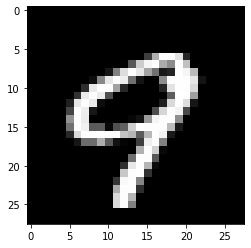

In [111]:
plt.imshow(grid_data, cmap='gray')
plt.show()

### So label matches with digit represented by image

## PCA

### manual 

In [112]:
# take 15k datapoints
labels = l.head(15000)
data = d.head(15000)

In [113]:
print(data.shape)

(15000, 784)


In [114]:
# Data preprocessing - Standardize the data
from sklearn.preprocessing import StandardScaler

In [115]:
stand_data = StandardScaler().fit_transform(data)

In [116]:
print(stand_data.shape)

(15000, 784)


In [117]:
sample_data = stand_data

In [118]:
# find covariance matrix
covar_matrix = np.cov(sample_data.T)
covar_matrix.shape

(784, 784)

In [119]:
from scipy.linalg import eigh

In [120]:
values, vectors = eigh(covar_matrix, eigvals=[782, 783])

In [121]:
vectors.shape

(784, 2)

In [122]:
vectors = vectors.T

In [123]:
vectors.shape

(2, 784)

In [124]:
values

array([29.03743969, 40.38397838])

In [125]:
new_coordinates = np.matmul(vectors, sample_data.T)

In [126]:
new_coordinates.shape

(2, 15000)

In [127]:
new_coordinates = np.vstack((new_coordinates, labels)).T

In [128]:
df = pd.DataFrame(new_coordinates, columns=[ '2nd_Prin', '1st_Prin','label'])

In [129]:
df.head()

,2nd_Prin,1st_Prin,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


In [130]:
df.shape

(15000, 3)

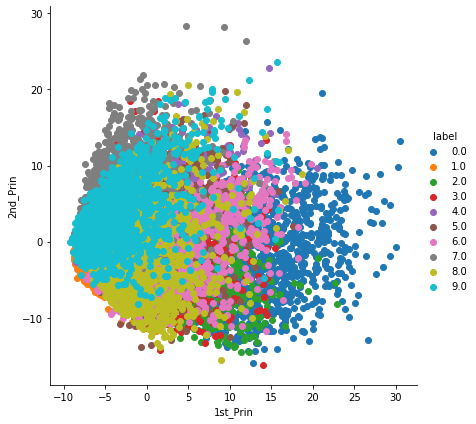

In [131]:
sns.FacetGrid(df, hue='label', height=6).map(plt.scatter, '1st_Prin', '2nd_Prin').add_legend()
plt.show()

### using pca

In [132]:
from sklearn import decomposition

In [133]:
pca = decomposition.PCA()

In [134]:
pca.n_components=2

In [135]:
pca_data = pca.fit_transform(sample_data)

In [136]:
pca_data.shape

(15000, 2)

In [137]:
pca_data = np.vstack((pca_data.T, labels)).T

In [139]:
pca_df = pd.DataFrame(data=pca_data, columns=['1st_Prin', '2nd_Prin', 'labels'])

In [140]:
pca_df.head()

,1st_Prin,2nd_Prin,labels
0,-5.043545,-5.558495,1.0
1,19.305293,6.194789,0.0
2,-7.678783,-1.909955,1.0
3,-0.464820,5.526199,4.0
4,26.644303,6.367240,0.0


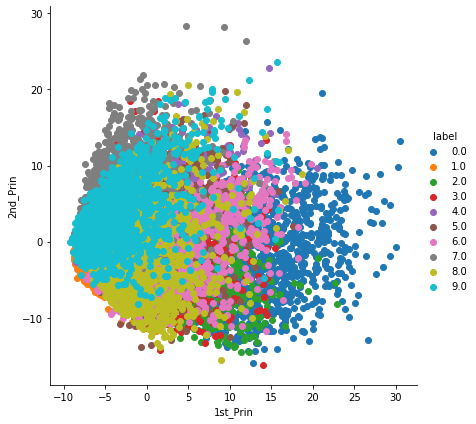

In [141]:
sns.FacetGrid(df, hue='label', height=6).map(plt.scatter, '1st_Prin', '2nd_Prin').add_legend()
plt.show()

### PCA for dimensionality redcution (not for visualization)

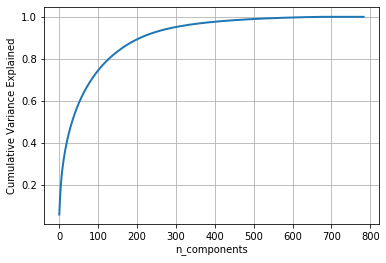

In [142]:
pca = decomposition.PCA()
pca.n_components=784
pca_data = pca.fit_transform(sample_data)

percent_variance_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percent_variance_explained)

plt.figure(figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

#### If we take 200-dimensions, approx. 90% of variance is expalined. Thus we can reduce dimensions from 784 to 200

### Cancer Dataset

In [58]:
from sklearn.datasets import load_breast_cancer

In [59]:
cancer = load_breast_cancer()

In [62]:
type(cancer)

sklearn.utils.Bunch

In [63]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [66]:
# benign
print(len(cancer.data[cancer.target==1]))

357


In [67]:
# Malignant
print(len(cancer.data[cancer.target==0]))

212


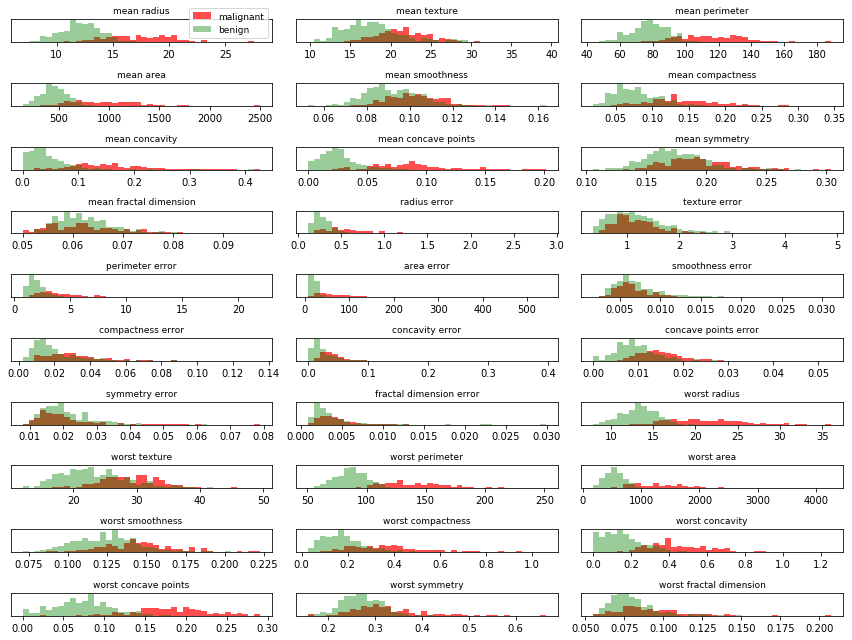

In [69]:
fig, axes = plt.subplots(10,3, figsize=(12,9))

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel() # flat axes with numpy ravel

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=40)
    ax[i].hist(malignant[:, i], bins=bins, color='r', alpha=0.7)
    ax[i].hist(benign[:,i], bins=bins, color='g', alpha=0.4)
    ax[i].set_title(cancer.feature_names[i], fontsize=9)
    ax[i].set_yticks(())
    
ax[0].legend(['malignant', 'benign'], loc='best', fontsize=9)
plt.tight_layout()
plt.show()


<p>Now from these histograms we see that features like- mean fractal dimension has very little role to play in discerning malignant from benign, but worst concave points or worst perimeter are useful features that can give us strong hint about the classes of cancer data-set. </p>

In [70]:
# Create a Cancer DataFrame
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names, )

In [71]:
cancer_df.shape

(569, 30)

In [72]:
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


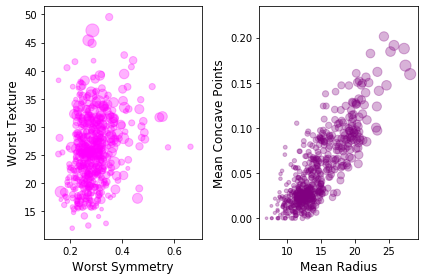

In [77]:
plt.subplot(1,2,1)

plt.scatter(x=cancer_df['worst symmetry'], y=cancer_df['worst texture'], \
            s=cancer_df['worst area']*0.05, color='magenta', label='check', alpha=0.3)

plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)

plt.subplot(1,2,2)
plt.scatter(x=cancer_df['mean radius'], y=cancer_df['mean concave points'], \
            s=cancer_df['mean area']*0.05, color='purple', label='check', alpha=0.3)

plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

<p>PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). </p>
<p> Anyway, from the cancer data-set we see that it has 30 features, so let’s reduce it to only 3 principal features and then we can visualize the scatter plot of these new independent variables. </p>

<p> Before applying PCA, we scale our data such that each feature has unit variance. This is necessary because fitting algorithms highly depend on the scaling of the features. Here we use the StandardScalermodule for scaling the features individually. StandardScalersubtracts the mean from each features and then scale to unit variance. </p>

In [78]:
scaler = StandardScaler()

scaler.fit(cancer.data)
x_scaled = scaler.transform(cancer.data)

In [81]:
pca = decomposition.PCA(n_components=3)
pca.fit(x_scaled)
X_pca = pca.transform(x_scaled)

print(X_pca.shape)

(569, 3)


In [84]:
# measure variance ration of principal components
ex_variance = np.var(X_pca, axis=0)
ex_variance_ratio = ex_variance/sum(ex_variance)

array([13.28160768,  5.69135461,  2.81794898])

In [85]:
print(np.var(X_pca, axis=0))

[13.28160768  5.69135461  2.81794898]


In [86]:
np.var(X_pca, axis=0)/np.sum(np.var(X_pca, axis=0))

array([0.60950217, 0.2611802 , 0.12931763])

[44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15 96.13 97.
 97.8  98.32 98.63 98.9  99.1  99.28 99.44 99.54 99.64 99.73 99.81 99.87
 99.92 99.95 99.97 99.98 99.98 99.98]


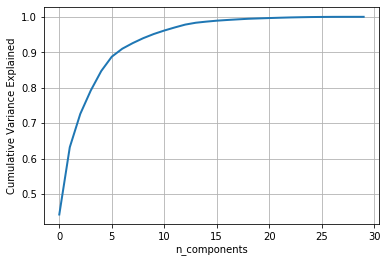

In [143]:
pca = decomposition.PCA()
pca.n_components=30
sample_data = StandardScaler().fit_transform(cancer.data)
pca_data = pca.fit_transform(sample_data)

percent_variance_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percent_variance_explained)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

plt.figure(figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

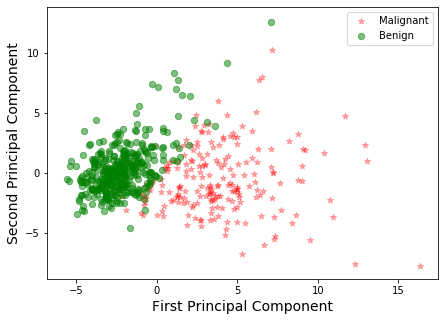

In [92]:
Xax = X_pca[:,0]
Yax = X_pca[:,1]

labels = cancer.target
cdict = {0:'red', 1:'green'}
labl = {0:'Malignant', 1:'Benign'}
marker = {0:'*', 1:'o'}
alpha={0:.3, 1:.5}

fig, ax = plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')

for l in np.unique(labels):
    ix = np.where(labels==l)
    ax.scatter(Xax[ix], Yax[ix], c=cdict[l], s=40, label=labl[l], marker=marker[l], alpha=alpha[l])
    
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()   



## Iris dataset

In [147]:
df_iris = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df_iris.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df_iris.dropna(how='all', inplace=True)
df_iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [149]:
X = df_iris.iloc[:, 0:4].values
y = df_iris.iloc[:, 4].values

In [150]:
X.shape

(150, 4)

In [151]:
type(X)

numpy.ndarray

In [152]:
y.shape

(150,)

In [153]:
type(y)

numpy.ndarray

In [154]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

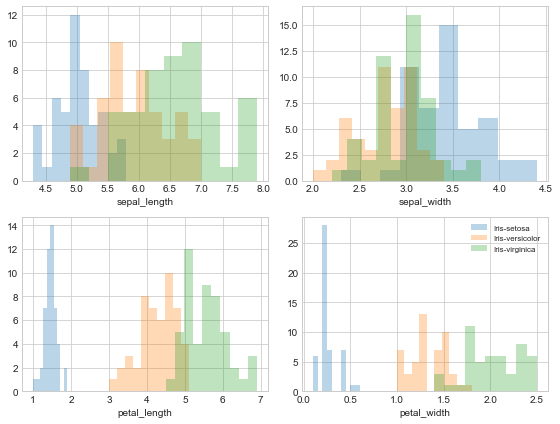

In [158]:
label_dict = {1:'Iris-Setosa', 2:'Iris-Versicolor', 3:'Iris-Virginica'}

feature_dict = {0: 'sepal_length', 1:'sepal_width', 2:'petal_length', 3:'petal_width'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2,2,cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt], label=lab, bins=10, alpha=0.3)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)
    plt.tight_layout()
    plt.show()


In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
X_std = StandardScaler().fit_transform(X)

In [162]:
X_std.shape

(150, 4)

### Covariance matrix

In [165]:
mean_vec = np.mean(X_std, axis=0)
mean_vec

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [166]:
cov_mat = (X_std - mean_vec).T.dot((X_std -mean_vec)) / (X_std.shape[0]-1)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [167]:
np.cov(X_std.T)

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [169]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [170]:
eig_vals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [171]:
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [174]:
cor_mat1 = np.corrcoef(X_std.T)
np.linalg.eig(cor_mat1)

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which can confirmed by the following two lines of code:
    

In [176]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [180]:
# Make a list of (eigenvalue, eigenvector) tuples

eig_pairs  = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [181]:
eig_pairs.sort(key=lambda x : x[0], reverse=True)

In [182]:
eig_pairs

[(2.9303537755893156,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173419,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648164008,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559599,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

### Explained Variance
After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [183]:
total = sum(eig_vals)

In [187]:
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
var_exp

[72.77045209380132, 23.03052326768065, 3.683831957627394, 0.5151926808906336]

In [189]:
cum_var_exp = np.cumsum(var_exp)

In [190]:
cum_var_exp

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

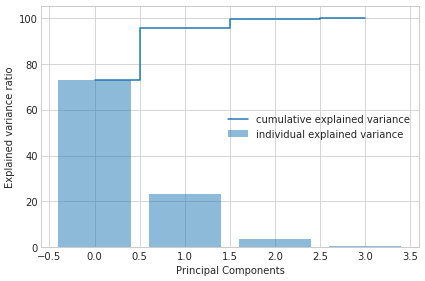

In [191]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    
    plt.bar(range(4), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained variance ratio')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

### Projection Matrix

It’s about time to get to the really interesting part: The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name “projection matrix” has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [192]:
eig_pairs

[(2.9303537755893156,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173419,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648164008,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559599,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [199]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
          eig_pairs[1][1].reshape(4,1)))
matrix_w

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

### 3 - Projection Onto the New Feature Space

In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
Y=X×W, where Y is a 150×2 matrix of our transformed samples.

In [201]:
Y = X_std.dot(matrix_w)


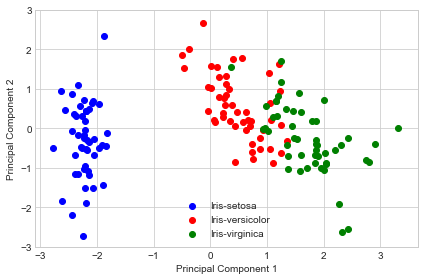

In [202]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab,0], Y[y==lab, 1], label=lab, c=col)
        
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## Shortcut - PCA in scikit-learn

In [205]:
pca = decomposition.PCA(n_components=2)
Y_sklearn = pca.fit_transform(X_std)

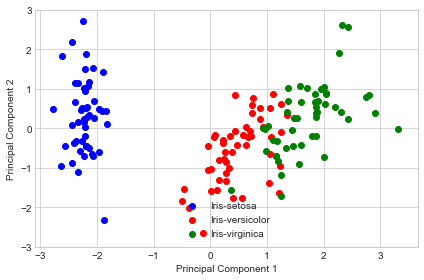

In [206]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## another example

In [207]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

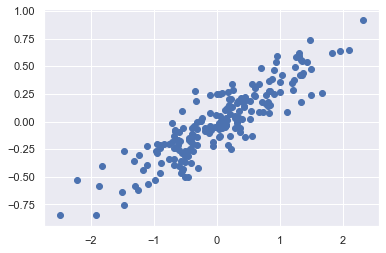

In [212]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1])
plt.show()

In [214]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [215]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [216]:
pca.explained_variance_

array([0.7625315, 0.0184779])

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

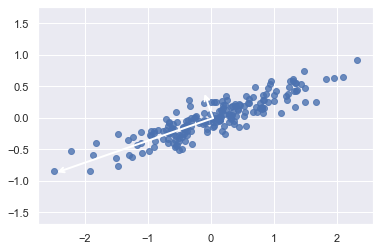

In [218]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.8)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
    

In [ ]:
# Reference 
https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb#scrollTo=vOrvN2nH1Ahf